#### IMPORTING LIBRARIES

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [292]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

/tmp/ipykernel_7043/466759996.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


This warning implies corrupt data in some of the columns which do not match the dtype of the specified column.We will handle this first by cleaning the data.

#### CLEANING THE DATA

In [293]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [294]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [295]:
drop_columns=['ID',"Customer_ID","Name","SSN"]

The columns "ID," "Customer_ID," "Name," and "SSN" likely contain sensitive personal information. So we drop these columns to avoid building a model which involves sensitive personal information. 



In [296]:
#Dropping the columns
train=train.drop(drop_columns,axis=1)
test=test.drop(drop_columns,axis=1)

In [297]:
#segregating the columns into numerical and categorical
categorical_columns = [cols for cols in train.columns if train[cols].dtype == object and cols != 'Credit_Score' ]
numerical_columns = [cols for cols in train.columns if train[cols].dtype != object]

In [298]:
categorical_columns

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [299]:
numerical_columns

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [300]:
train[categorical_columns].head()

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


In [301]:
#Annual_Income and Num_of_Loan which should be numerical columns became object because of corrupt data, so we shall replace these particular values

train['Annual_Income']=train["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Annual_Income']=test["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
train["Num_of_Loan"]=train["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)
test["Num_of_Loan"]=test["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)

In [302]:
train['Annual_Income']=train["Annual_Income"].astype(float)
test['Annual_Income']=test["Annual_Income"].astype(float)

In [303]:
categorical_columns.remove('Annual_Income')
numerical_columns.append('Annual_Income')

In [304]:
train["Num_of_Loan"]=train["Num_of_Loan"].astype(int)
test["Num_of_Loan"]=test["Num_of_Loan"].astype(int)

In [305]:
categorical_columns.remove('Num_of_Loan')
numerical_columns.append('Num_of_Loan')

In [306]:
train[categorical_columns].head()

,Month,Age,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,-500,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


In [307]:
#The next column we will try to modify is age as clearly age is a numerical column
train['Age'].unique()


array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [308]:
train['Age']=train["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Age']=test["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)

In [309]:
train['Age'].unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [310]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)

In [311]:
#Dropping the negative values
mask = train['Age'] < 0
train = train.loc[~mask]
mask = test['Age'] < 0
test = test.loc[~mask]


In [312]:
train['Age'].unique()

array([  23,   28,   34, ..., 4808, 2263, 1342])

In [313]:
train.shape

(99114, 24)

In [314]:
#dropping the values which have age > 120
mask = train['Age'] >120
train = train.loc[~mask]


In [315]:
train.shape

(97230, 24)

In [316]:
train['Age'].unique()

array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  16,  18,  15,  27,  25,  14,  17,  47,  53,  56,  29,
        49,  51,  50,  52, 112, 118,  99, 100, 102, 111,  95, 109, 115])

The values now have a more suitable range and thus can be added to the numerical columns.

In [317]:
categorical_columns.remove('Age')
numerical_columns.append('Age')

In [318]:
train[categorical_columns].head()

,Month,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
5,June,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,9.27,Good,809.98,22 Years and 6 Months,No,62.430172331195294,!@9#%8,340.4792117872438


In [319]:
#TODO : Figure out whether to drop the test.csv file altogether
#Change values in the remaining categorical columns and fix the numerical columns
train.shape

(97230, 24)

1. Monthly Balance (done)
2. Amount_invested_monthly
3. Outstanding_Debt
4. Changed_Credit_Limit
5. Payment_of_Min_Amount

Tasks:
1. Make a plot function for both catgeorical and numerical values
2. Figure out what to do with numerical values(scaling)


- Min-max scaling
- Binning


In [320]:
train.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14597
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11076
Delay_from_due_date             0
Num_of_Delayed_Payment       6826
Changed_Credit_Limit            0
Num_Credit_Inquiries         1906
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8794
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4344
Payment_Behaviour               0
Monthly_Balance              1179
Credit_Score                    0
dtype: int64

### Cleaning and Plotting Functions

In [321]:
#For plotting histogram of integer data
def plot_distribution(data, bins=10, xlabel='', ylabel='', color='skyblue'):
    # Create a histogram of the data
    plt.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    title = 'Distribution of ' + xlabel
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()


In [322]:
#For plotting Distribution plot
def dist_plot(column = "",df = train):
    plt.figure(figsize=(6,4))
    sns.displot(df[column])
    plt.title(column, size=15)
    plt.show()

In [323]:
def replace(column,character = "_"):
    train[column]=train[column].apply(lambda x:x.replace(character,"") if character in x else x)

In [324]:
def category_distributions(x,data = train,title = '',size = 15):
    plt.figure(figsize=(10,6))
    sns.countplot(x=x,data = data)
    plt.title(title, size=size)
    plt.show()

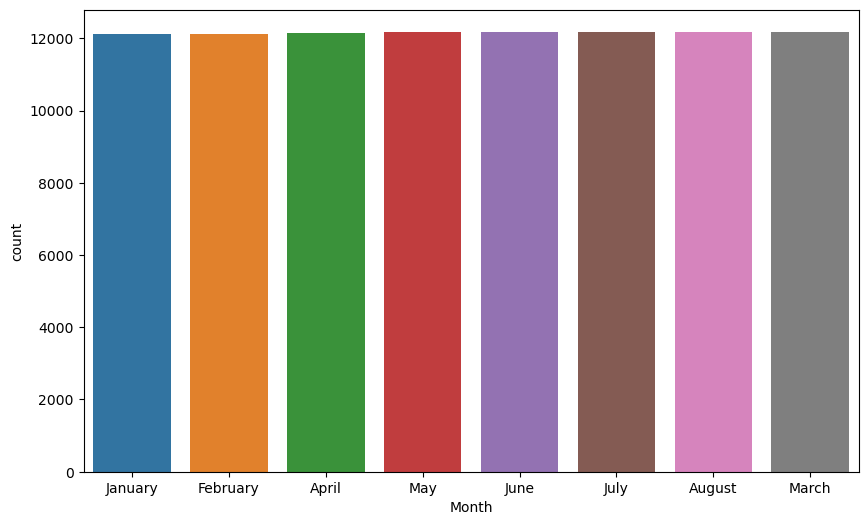

In [325]:
category_distributions(x = 'Month')

In [326]:
train['Month'].unique()

array(['January', 'February', 'April', 'May', 'June', 'July', 'August',
       'March'], dtype=object)

- We see that the distribution is even with no missing values and even distribution so we can go ahead without any changes

In [327]:
train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '223.45130972736786',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [328]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
307.89891340252535                  1
425.71252921072                     1
401.81301155241687                  1
                                   ..
309.4159683487181                   1
272.22357341904336                  1
257.2822542162112                   1
247.5347047656841                   1
393.6736955618808                   1
Name: count, Length: 96043, dtype: int64

- Need to fix this particular value

In [329]:

train['Monthly_Balance'].isna().sum()/train['Monthly_Balance'].size * 100


1.2125887071891392

- As the number of missing values is less than 3% we can fill the value with the median of the data

In [331]:
train['Monthly_Balance'] = train['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
train['Monthly_Balance'].median(skipna=True)

336.6603987296653

In [332]:
train['Monthly_Balance'].fillna(338.6005086826142, inplace=True)
train['Monthly_Balance'].isna().sum()

0

In [333]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(float)

/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x400 with 0 Axes>

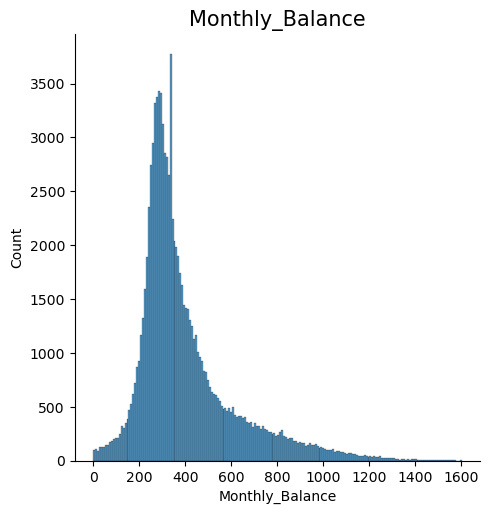

In [334]:
dist_plot(column='Monthly_Balance')

In [336]:
#Amount_invested_monthly
train['Amount_invested_monthly'].isna().sum()

4344

In [337]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
338.600509    1189
312.494089       1
251.676310       1
415.325323       1
370.437016       1
              ... 
309.415968       1
272.223573       1
257.282254       1
247.534705       1
393.673696       1
Name: count, Length: 96042, dtype: int64